In [2]:
import h5py
import json
import numpy as np
import pandas as pd
import glob 
import os

For Can Dataset

In [19]:
import h5py
import numpy as np

# For Can Dataset
# file_path = "/home/sj/Documents/processed_data96.hdf5"

# For Square Dataset
file_path = "/home/sj/Documents/square/processed_data96_sq.hdf5"

# For Can Dataset
# indexes = [52, 57, 55, 45, 51, 59, 46, 46, 46, 61]
# For Square Dataset
indexes = [53, 55, 68, 45, 48, 59, 44, 49, 77, 66, 47, 49, 54, 57, 55, 64, 83, 53, 29, 53, 73, 62, 42, 74, 54, 47, 55, 51, 54, 62, 63, 60, 52, 52, 72, 50, 57, 69, 37, 51, 63, 50, 52, 27, 62, 43, 51, 78, 67, 38]

count = 0

mode_data = []

# Open the HDF5 file
with h5py.File(file_path, 'a') as f:
    # Iterate through each demo group
    for demo_name in f["data"].keys():
        demo_group = f['data'][demo_name]
        
        # Access the corner2_image dataset within the obs group of the demo group_can
        # image_data = demo_group['obs']['robot0_eye_in_hand_image'][:]
        
        # Access the corner2_image dataset within the obs group of the demo group_square
        image_data = demo_group['obs']['agentview_image'][:]
        #         
        # Perform the operation on the image array
        image_data = np.array(image_data)
        # print(image_data.shape)

        mode_data = ([0]*(indexes[count]+1) + [1]*(image_data.shape[0] - indexes[count]-1))

        demo_group.create_dataset("mode", data=mode_data)

        object_pos = demo_group['obs']['object'][:]
        object_eff_pos = np.array(object_pos)
        print(object_pos.shape)

        waypoint_data = np.zeros((object_pos.shape[0], 3))

        for i in range(indexes[count]+1):
            waypoint_data[i] = object_pos[indexes[count]+1, :3]

        demo_group.create_dataset("waypoints", data=waypoint_data)
        
        count += 1



(127, 14)
(123, 14)
(134, 14)
(156, 14)
(133, 14)
(153, 14)
(152, 14)
(141, 14)
(174, 14)
(174, 14)
(127, 14)
(165, 14)
(124, 14)
(145, 14)
(179, 14)
(130, 14)
(176, 14)
(155, 14)
(158, 14)
(182, 14)
(180, 14)
(136, 14)
(183, 14)
(149, 14)
(134, 14)
(139, 14)
(142, 14)
(120, 14)
(129, 14)
(174, 14)
(147, 14)
(160, 14)
(114, 14)
(128, 14)
(154, 14)
(140, 14)
(134, 14)
(186, 14)
(122, 14)
(125, 14)
(180, 14)
(132, 14)
(148, 14)
(170, 14)
(167, 14)
(144, 14)
(144, 14)
(150, 14)
(160, 14)
(152, 14)


For assembly metaworld

In [43]:
import h5py
import numpy as np
import random
import cv2
from skimage.transform import rotate, rescale
from skimage.color import rgb2gray
from scipy.ndimage import rotate as scipy_rotate

def random_rotation(image):
    angle = random.uniform(-30, 30)  # Rotate between -30 and 30 degrees
    rotated = scipy_rotate(image, angle, axes=(1, 2), reshape=False, mode='nearest')
    return rotated.astype(np.uint8)

def random_zoom(image):
    zoom_factor = random.uniform(0.8, 1.2)  # Zoom between 80% and 120%
    zoomed = rescale(image, zoom_factor, mode='reflect', channel_axis=0, anti_aliasing=True, preserve_range=True)
    
    # Crop or pad the image to maintain original dimensions
    target_shape = image.shape
    if zoomed.shape[1] > target_shape[1]:
        start = (zoomed.shape[1] - target_shape[1]) // 2
        zoomed = zoomed[:, start:start+target_shape[1], start:start+target_shape[2]]
    elif zoomed.shape[1] < target_shape[1]:
        pad_width = ((0, 0), 
                     ((target_shape[1] - zoomed.shape[1]) // 2, (target_shape[1] - zoomed.shape[1] + 1) // 2),
                     ((target_shape[2] - zoomed.shape[2]) // 2, (target_shape[2] - zoomed.shape[2] + 1) // 2))
        zoomed = np.pad(zoomed, pad_width, mode='reflect')
    
    return zoomed.astype(np.uint8)

def to_grayscale(image):
    gray = rgb2gray(np.transpose(image, (1, 2, 0)))  # Transpose to (96, 96, 3) for rgb2gray
    return (gray * 255).astype(np.uint8)[np.newaxis].repeat(3, axis=0)  # Add channel dimension and repeat

def apply_random_augmentation(image):
    aug_funcs = [random_rotation, random_zoom]
    aug_func = random.choice(aug_funcs)
    augmented = aug_func(image)
    
    # Ensure the output shape is correct
    if augmented.shape != (3, 96, 96):
        augmented = cv2.resize(np.transpose(augmented, (1, 2, 0)), (96, 96))
        augmented = np.transpose(augmented, (2, 0, 1))
    
    return augmented.astype(np.uint8)

# split_index = [14, 14, 14, 14, 14]
# sparse_insert_idx = [18, 18, 18, 18, 18]
# dense_insert_idx = [18, 18, 18, 18, 18]
# # For Assembly Dataset
# file_path = "/home/sj/Downloads/assembly_mw12.hdf5"

# split_index = [12,11,12,15,12]
# sparse_insert_idx = [18, 18, 18, 18, 18]
# dense_insert_idx = [18, 18, 18, 18, 18]
# # For Stickpull Dataset
# file_path = "/home/sj/Downloads/stickpull_mw12.hdf5"

# split_index = [16,18,18,18,18]
# sparse_insert_idx = [18, 18, 18, 18, 18]
# dense_insert_idx = [18, 18, 18, 18, 18]
# # For Coffepush Dataset
# file_path = "/home/sj/Downloads/coffeepush_mw12.hdf5"

split_index = [37, 23, 26, 26, 23]
sparse_insert_idx = [18, 18, 18, 18, 18]
dense_insert_idx = [18, 18, 18, 18, 18]
# For Boxclose Dataset
file_path = "/home/sj/Downloads/boxclose_mw12.hdf5"

count = 0
with h5py.File(file_path, 'a') as f:
    for demo_name in f["data"].keys():
        demo_group = f['data'][demo_name]
        image_data = demo_group['obs']['corner2_image'][:]
        image_data = np.array(image_data)

        sparse_set = image_data[:split_index[count]]

        print(f"Length before processing = {len(image_data)}")

        # Start with the initial sparse set
        new_image_data = sparse_set.tolist()

        # Insert previous images to make transition smooth
        for i in range(1, len(sparse_set)):
            aug_image = apply_random_augmentation(sparse_set[i - 1])
            new_image_data.insert(2 * i - 1, aug_image)

        # Convert back to a numpy array for further processing
        new_image_data = np.array(new_image_data)

        # Number of additional images needed to reach sparse_insert_idx
        remaining_sparse = sparse_insert_idx[count] - len(sparse_set)

        # Insert additional previous images if necessary, starting from the beginning
        for i in range(remaining_sparse):
            aug_image = apply_random_augmentation(sparse_set[i % len(sparse_set)])
            new_image_data = np.insert(new_image_data, 2 * (i + 1) - 1, aug_image, axis=0)

        # Carry out the same process for the dense set
        dense_set = image_data[split_index[count]:]

        # Start with the initial dense set
        new_image_data2 = dense_set.tolist()

        if len(dense_set) > dense_insert_idx[count]:
            # Insert previous images to make transition smooth
            for i in range(1, dense_insert_idx[count]):
                aug_image = apply_random_augmentation(dense_set[i - 1])
                new_image_data2.insert(2 * i - 1, aug_image)

            # Convert back to a numpy array for further processing
            new_image_data2 = np.array(new_image_data2)

            print("dense set > dense insert idx")

        else:
            # Insert previous images to make transition smooth
            for i in range(1, len(dense_set)):
                aug_image = apply_random_augmentation(dense_set[i - 1])
                new_image_data2.insert(2 * i - 1, aug_image)

            # Convert back to a numpy array for further processing
            new_image_data2 = np.array(new_image_data2)

            # Number of additional images needed to reach dense_insert_idx
            remaining_dense = dense_insert_idx[count] - len(dense_set)

            # Insert additional previous images if necessary, starting from the beginning
            for i in range(remaining_dense):
                aug_image = apply_random_augmentation(dense_set[i % len(dense_set)])
                new_image_data2 = np.insert(new_image_data2, 2 * (i + 1) - 1, aug_image, axis=0)

            print("dense set < dense insert idx")

        # Combine the sparse and dense sets
        new_image_data = np.concatenate((new_image_data, new_image_data2), axis=0)

        # Delete the existing dataset
        del demo_group['obs']['corner2_image']

        # Create a new dataset with the same name
        demo_group['obs'].create_dataset('corner2_image', data=new_image_data)

        print(f"Processed {demo_name}: new length = {len(new_image_data)}")
        print("===============================================")


        count += 1


Length before processing = 67
dense set > dense insert idx
Processed demo_0: new length = 120
Length before processing = 54
dense set > dense insert idx
Processed demo_1: new length = 93
Length before processing = 56
dense set > dense insert idx
Processed demo_2: new length = 98
Length before processing = 56
dense set > dense insert idx
Processed demo_3: new length = 98
Length before processing = 100
dense set > dense insert idx
Processed demo_4: new length = 139


In [44]:
import h5py
import numpy as np
import random

def mean_data(data1, data2):
    new_data = np.mean([data1, data2], axis=0)
    return new_data

# split_index = [14, 14, 14, 14, 14]
# sparse_insert_idx = [18, 18, 18, 18, 18]
# dense_insert_idx = [18, 18, 18, 18, 18]
# # For Assembly Dataset
# file_path = "/home/sj/Downloads/assembly_mw12.hdf5"

# split_index = [12,11,12,15,12]
# sparse_insert_idx = [18, 18, 18, 18, 18]
# dense_insert_idx = [18, 18, 18, 18, 18]
# # For Stickpull Dataset
# file_path = "/home/sj/Downloads/stickpull_mw12.hdf5"

# split_index = [16,18,18,18,18]
# sparse_insert_idx = [18, 18, 18, 18, 18]
# dense_insert_idx = [18, 18, 18, 18, 18]
# # For Coffepush Dataset
# file_path = "/home/sj/Downloads/coffeepush_mw12.hdf5"

split_index = [37, 23, 26, 26, 23]
sparse_insert_idx = [18, 18, 18, 18, 18]
dense_insert_idx = [18, 18, 18, 18, 18]
# For Boxclose Dataset
file_path = "/home/sj/Downloads/boxclose_mw12.hdf5"

count = 0

with h5py.File(file_path, 'a') as f:
    for demo_name in f["data"].keys():
        demo_group = f['data'][demo_name]

        datasets = {
            'actions': demo_group['actions'][:],
            'dones': demo_group['dones'][:],
            'mode1': demo_group['mode1'][:],
            'mode2': demo_group['mode2'][:],
            'rewards': demo_group['rewards'][:],
            'states': demo_group['states'][:],
            'waypoint1': demo_group['waypoint1'][:],
            'waypoint2': demo_group['waypoint2'][:],
            'prop': demo_group['obs']['prop'][:],
            'state': demo_group['obs']['state'][:]
        }

        for key, dataset in datasets.items():
            sparse_set = dataset[:split_index[count]]

            print(f"Length before processing = {len(dataset)}")
            
            # Start with the initial sparse set
            new_data = sparse_set.tolist()

            for i in range(1, len(sparse_set)):
                aug_data = mean_data(sparse_set[i-1], sparse_set[i])
                new_data.insert(2 * i - 1, aug_data)

            # Convert to a numpy array for further processing
            new_data = np.array(new_data)

            # Number of additional data points needed to reach sparse_insert_idx
            remaining_sparse = sparse_insert_idx[count] - len(sparse_set)

            # Insert additional data if necessary, starting from the beginning
            for i in range(remaining_sparse):
                aug_data = mean_data(sparse_set[i % len(sparse_set)], sparse_set[(i+1) % len(sparse_set)])
                new_data = np.insert(new_data, 2 * (i + 1) - 1, aug_data, axis=0)

            # Carry out the same process for the dense set
            dense_set = dataset[split_index[count]:]

            # Process the dense set
            new_data2 = dense_set.tolist()

            if len(dense_set) > dense_insert_idx[count]:
                for i in range(1, dense_insert_idx[count]):
                        aug_data = mean_data(dense_set[i-1], dense_set[i])
                        new_data2.insert(2 * i - 1, aug_data)
                
                new_data2 = np.array(new_data2)

                print("dense set > dense insert idx")

            else:
                for i in range(1, len(dense_set)):
                        aug_data = mean_data(dense_set[i-1], dense_set[i])
                        new_data2.insert(2 * i - 1, aug_data)
                
                new_data2 = np.array(new_data2)

                # Number of additional data points needed to reach dense_insert_idx
                remaining_dense = dense_insert_idx[count] - len(dense_set)

                # Insert additional data if necessary, starting from the beginning
                for i in range(remaining_dense):
                    aug_data = mean_data(dense_set[i % len(dense_set)], dense_set[(i+1) % len(dense_set)])
                    new_data2 = np.insert(new_data2, 2 * (i + 1) - 1, aug_data, axis=0)

                print("dense set < dense insert idx")

            # Combine the sparse and dense sets
            new_data = np.concatenate((new_data, new_data2), axis=0)

            # Delete the existing dataset
            if key in ['prop', 'state']:
                del demo_group['obs'][key]
                # Create a new dataset with the same name
                demo_group['obs'].create_dataset(key, data=new_data)
            else:
                del demo_group[key]
                # Create a new dataset with the same name
                demo_group.create_dataset(key, data=new_data)

            print(f"Processed {demo_name} - {key}: new length = {len(new_data)}")

        print("===============================================")

        count += 1

Length before processing = 67
dense set > dense insert idx
Processed demo_0 - actions: new length = 120
Length before processing = 67
dense set > dense insert idx
Processed demo_0 - dones: new length = 120
Length before processing = 67
dense set > dense insert idx
Processed demo_0 - mode1: new length = 120
Length before processing = 67
dense set > dense insert idx
Processed demo_0 - mode2: new length = 120
Length before processing = 67
dense set > dense insert idx
Processed demo_0 - rewards: new length = 120
Length before processing = 67
dense set > dense insert idx
Processed demo_0 - states: new length = 120
Length before processing = 67
dense set > dense insert idx
Processed demo_0 - waypoint1: new length = 120
Length before processing = 67
dense set > dense insert idx
Processed demo_0 - waypoint2: new length = 120
Length before processing = 67
dense set > dense insert idx
Processed demo_0 - prop: new length = 120
Length before processing = 67
dense set > dense insert idx
Processed d

Code for getting and plotting parameters for seed data

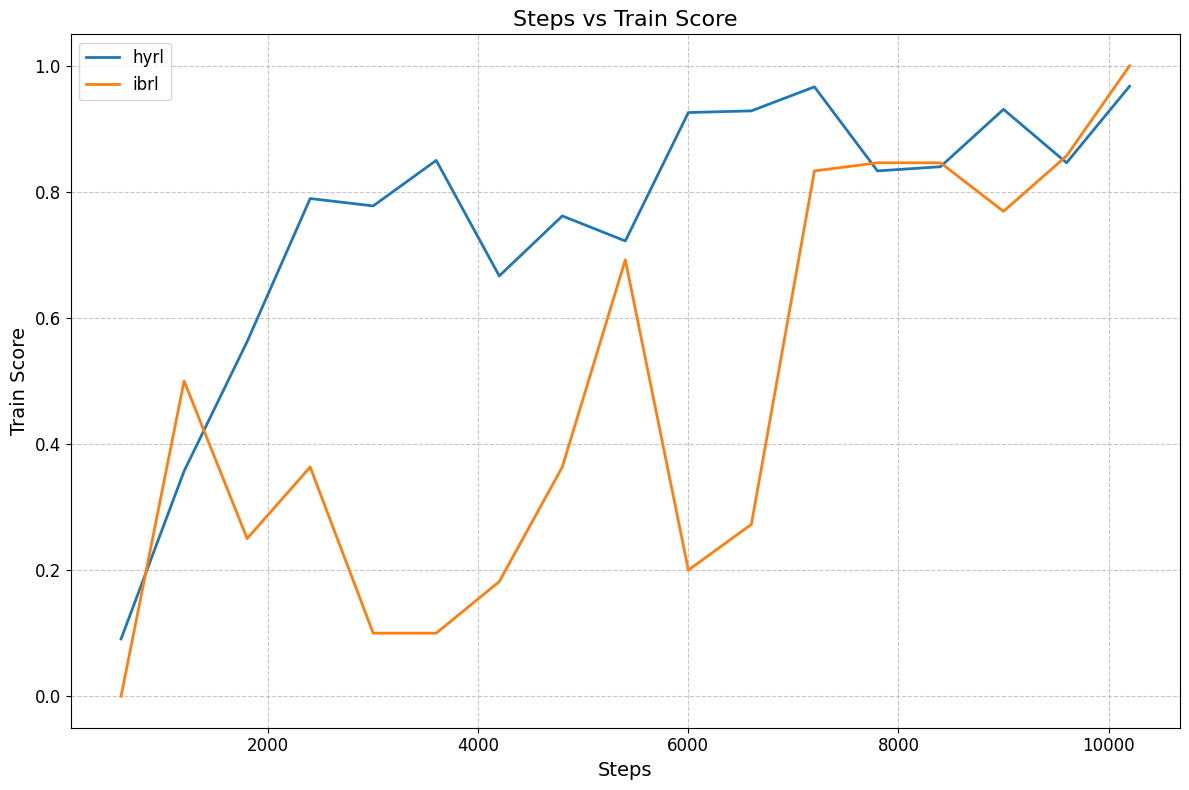

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def extract_data(file_path):
    steps = []
    num_successes = []
    with open(file_path, 'r') as f:
        for line in f:
            if 'other/step' in line:
                steps.append(int(line.split(':')[2].strip()))
            elif 'score/train_score' in line:
                # Extract the average train score
                avg_score = float(line.split('avg:')[1].split(',')[0].strip())
                num_successes.append(avg_score)
    return steps, num_successes

def process_algorithm(algorithm, task_dir):
    all_steps = []
    all_num_successes = []
    algorithm_path = os.path.join(task_dir, algorithm)
    if os.path.isdir(algorithm_path):
        log_path = os.path.join(algorithm_path, 'train.log')
        if os.path.exists(log_path):
            steps, num_successes = extract_data(log_path)
            all_steps.append(steps)
            all_num_successes.append(num_successes)
    return all_steps, all_num_successes

def plot_algorithms(data_collector):
    plt.figure(figsize=(12, 8))
    colors = list(mcolors.TABLEAU_COLORS.values())  # More diverse and consistent colors
    
    for algorithm, data in data_collector.items():
        color = colors.pop(0)
        all_steps, all_num_successes = data
        mean_steps = np.mean(all_steps, axis=0)
        mean_num_successes = np.mean(all_num_successes, axis=0)
        
        plt.plot(mean_steps, mean_num_successes, linewidth=2, color=color, label=algorithm)
    
    plt.title('Steps vs Train Score', fontsize=16)
    plt.xlabel('Steps', fontsize=14)
    plt.ylabel('Train Score', fontsize=14)
    plt.legend(loc='upper left', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tick_params(axis='both', which='major', labelsize=12)
    
    plt.tight_layout()
    plt.savefig('assembly_performance_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

# Main execution
root_dir = 'exps/rl/'  # Adjust to your actual directory path
task_dir = os.path.join(root_dir, 'hardware_no_rand')
algorithms = ['hyrl', 'ibrl']  # Adjust the folder names if needed
data_collector = {}

for algorithm in algorithms:
    data = process_algorithm(algorithm, task_dir)
    if data[0]:  # Check if any data was actually added
        data_collector[algorithm] = data

if data_collector:
    plot_algorithms(data_collector)
else:
    print("No data found for any algorithm.")


In [3]:
plt.savefig('assembly_performance_comparison.png', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

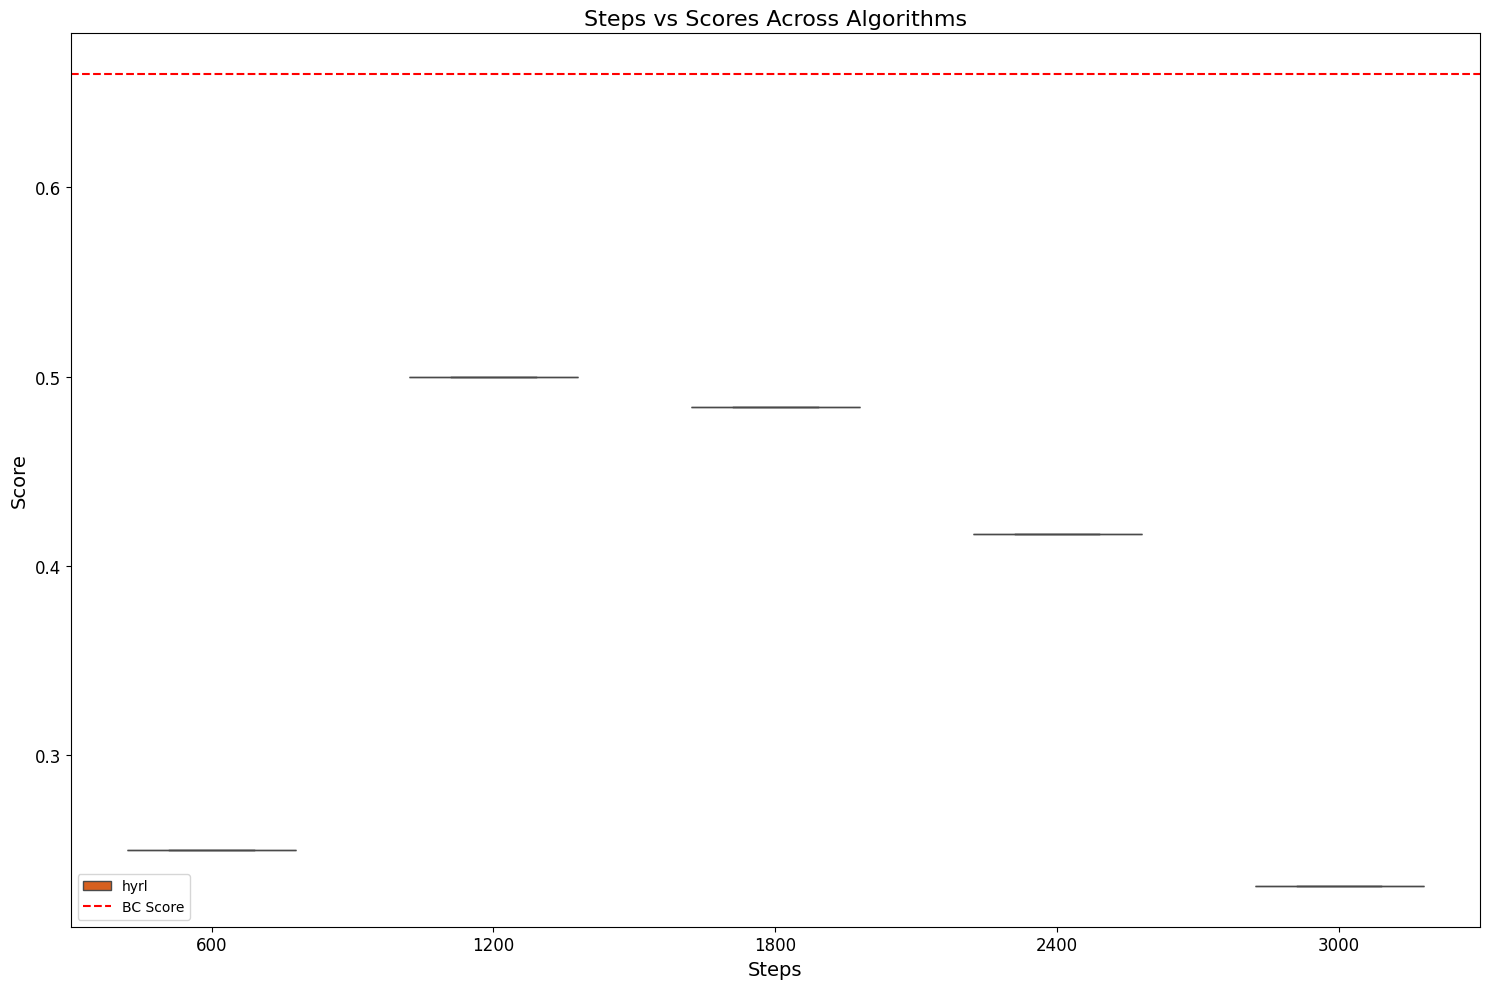

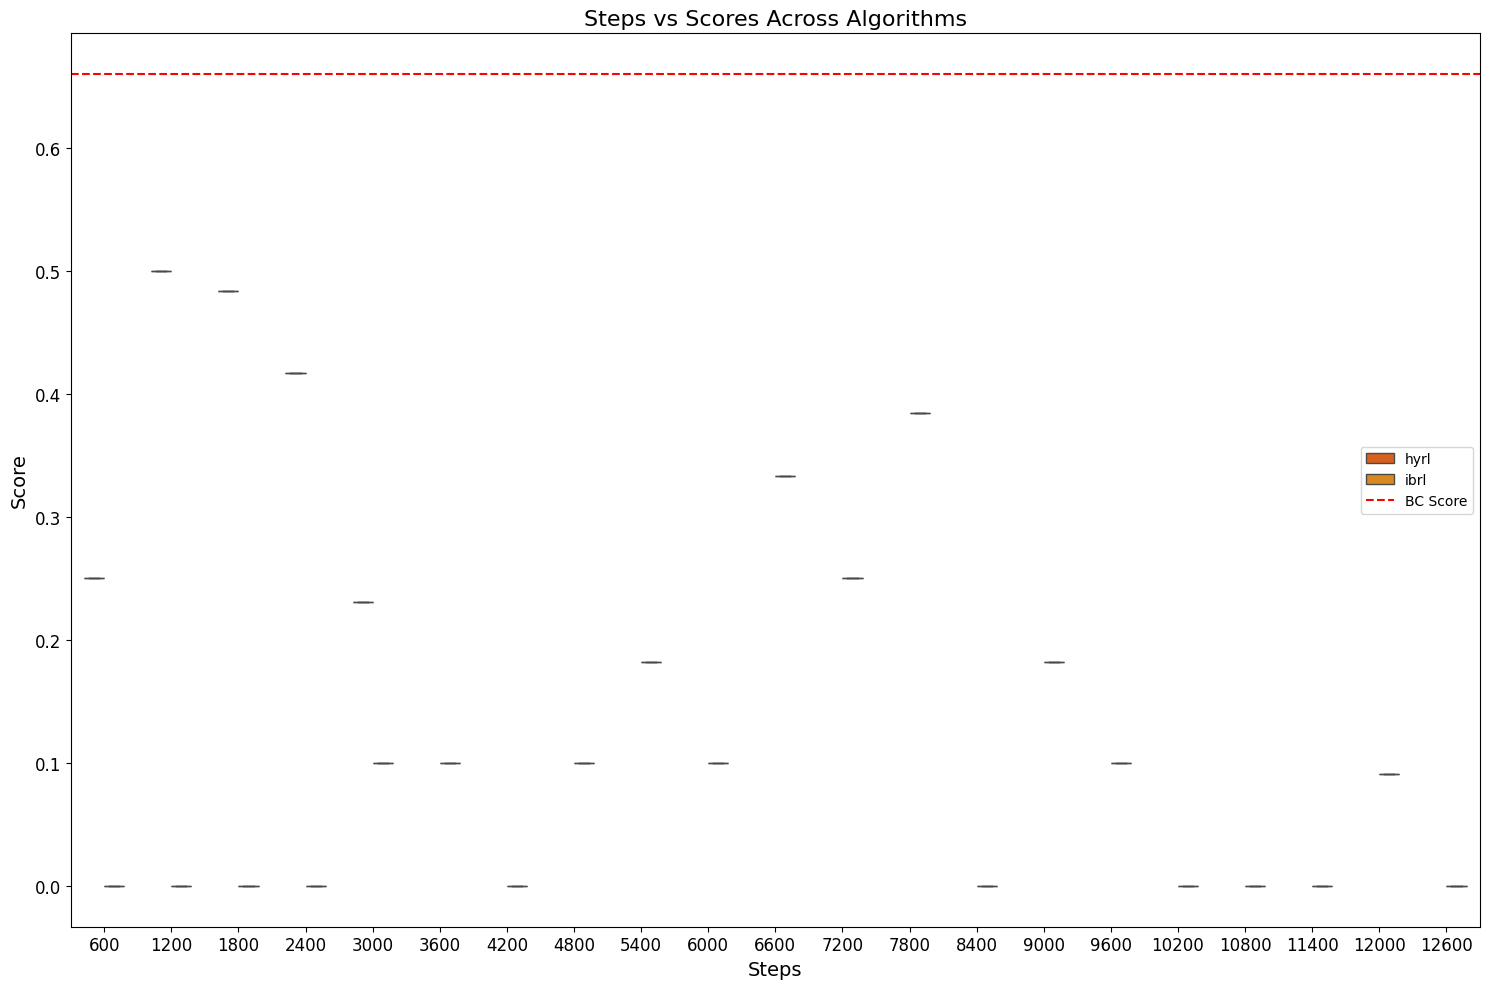

No data found for any algorithm.


In [18]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import seaborn as sns
import pandas as pd

def clamp_values(values, min_value=0.0, max_value=1.0):
    return np.clip(values, min_value, max_value)
def plot_algorithms(data_collector, color_codes, bc_score):
    fig, ax1 = plt.subplots(1, 1, figsize=(15, 10))
    # Prepare data for plotting
    step_data = []
    episode_data = []
    labels = []
    max_steps = max(max(max(steps) for steps in data[0]) for data in data_collector.values())
    max_episodes = max(max(max(episodes) for episodes in data[2]) for data in data_collector.values())
    for algorithm, data in data_collector.items():
        all_steps, all_score, all_episodes = data
        for steps, scores, episodes in zip(all_steps, all_score, all_episodes):
            for step, score in zip(steps, scores):
                step_data.append((algorithm, step, score))
            for episode, score in zip(episodes, scores):
                episode_data.append((algorithm, episode, score))
        labels.append(algorithm)
    # Create DataFrame for seaborn
    step_df = pd.DataFrame(step_data, columns=['Algorithm', 'Step', 'Score'])
    episode_df = pd.DataFrame(episode_data, columns=['Algorithm', 'Episode', 'Score'])
    # Custom palette
    palette = {alg: color_codes[alg] for alg in labels}
    # Plot Steps vs Scores
    sns.boxplot(x='Step', y='Score', hue='Algorithm', data=step_df, ax=ax1,
                whis=[0, 100], width=0.6, palette=palette)
    ax1.set_title('Steps vs Scores Across Algorithms', fontsize=16)
    ax1.set_xlabel('Steps', fontsize=14)
    ax1.set_ylabel('Score', fontsize=14)
    ax1.legend(title='Algorithm', title_fontsize='13', fontsize='12')
    ax1.tick_params(axis='both', which='major', labelsize=12)
    # Add BC score line
    ax1.axhline(y=bc_score, color='red', linestyle='--', label='BC Score')
    ax1.legend()
    plt.tight_layout()
    plt.savefig('algorithm_comparison_boxplots.png', dpi=300, bbox_inches='tight')
    plt.show()# Continue with your main execution as before

def extract_data(file_path):
    steps = []
    num_successes = []
    episodes = []
    with open(file_path, 'r') as f:
        for line in f:
            if 'other/step' in line:
                steps.append(int(line.split(':')[2].strip()))
            elif 'score/train_score' in line:
                # Extract the average train score
                avg_score = float(line.split('avg:')[1].split(',')[0].strip())
                num_successes.append(avg_score)
            # elif 'score/score' in line:
            #     # Extract the average train score
            #     avg_score = float(float(line.split(':')[2].strip()))
            #     num_successes.append(avg_score)
            elif 'other/episode' in line:
                episodes.append(int(line.split(':')[2].strip()))
    return steps, num_successes, episodes

def process_algorithm(algorithm, task_dir):
    all_steps = []
    all_num_successes = []
    all_episodes = []
    algorithm_path = os.path.join(task_dir, algorithm)
    if os.path.isdir(algorithm_path):
        for seed_dir in os.listdir(algorithm_path):
            # log_path = os.path.join(algorithm_path, seed_dir, 'train.log')
            log_path = os.path.join(algorithm_path, 'train.log')
            if os.path.exists(log_path):
                steps, num_successes, episodes = extract_data(log_path)
                all_steps.append(steps)
                all_num_successes.append(num_successes)
                all_episodes.append(episodes)
    return all_steps, all_num_successes, all_episodes# Main execution
root_dir = '/home/amisha/HYBRID-RL/exps/rl'  # Adjust to your actual directory path
task_dir = os.path.join(root_dir, 'hardware')
algorithms = ['hyrl', 'ibrl']  # Adjust the folder names if needed
data_collector = {}# For plotting BC
env_name = task_dir.split("/")[-1]
bc_scores={"hardware": 0.66, "assembly": 0.54, "boxclose":0.34, "coffeepush" : 0.44 , "stickpull":0.12,
           "assembly_rand": 0.54, "boxclose_rand":0.34, "coffeepush_rand" : 0.44 , "stickpull_rand":0.12}# Custom color codes for each algorithm
color_codes = {
    'hyrl': '#F65700',
    'ibrl': '#F68D00',
    'RL': '#A1A1A1',
    'ILSD': '#824504',
    'IL': '#FFD700',
    'RLSD': '#C5CF28'
}
for algorithm in algorithms:
    data = process_algorithm(algorithm, task_dir)
    if data[0]:  # Check if any data was actually added
        data_collector[algorithm] = data
    if data_collector:
        plot_algorithms(data_collector, color_codes, bc_scores[env_name])
else:
    print("No data found for any algorithm.")